In [1]:
import os

In [2]:
os.getcwd()

'/Users/mbocquel/Documents/Leaf_propre'

In [3]:
os.listdir("img_for_test/Distribution/test1/Grape_Esca")

['image (16).JPG',
 'image (17).JPG',
 'image (14).JPG',
 'image (18).JPG',
 'image (19).JPG',
 'image (15).JPG',
 'image (12).JPG',
 'image (13).JPG']

In [4]:
from configs.config import CFG

In [2]:
CFG

{'data': {'path': 'data/', 'imgSize': 256, 'load_with_info': True},
 'train': {'batch_size': 32,
  'epoch': 15,
  'train_split': 0.7,
  'optimizer': 'adam',
  'metrics': ['accuracy']},
 'model': {'input_shape': [256, 256, 3]}}

In [4]:
type(CFG)
import json

In [6]:
type(json.dumps(CFG))

str

In [8]:
test = json.loads(json.dumps(CFG))

In [9]:
type(test)

dict

In [16]:
test

{'data': {'path': 'data/', 'imgSize': 256, 'load_with_info': True},
 'train': {'batch_size': 32,
  'epoch': 15,
  'train_split': 0.7,
  'optimizer': 'adam',
  'metrics': ['accuracy']},
 'model': {'input_shape': [256, 256, 3]}}

In [17]:

class HelperObject(object):
    """Helper class to convert json into Python object"""
    def __init__(self, dict_):
        self.__dict__.update(dict_)

In [18]:
test2 = json.loads(json.dumps(CFG), object_hook=HelperObject)

In [24]:
test2.data.path

'data/'

In [29]:
test2.data.__dict__

{'path': 'data/', 'imgSize': 256, 'load_with_info': True}

In [2]:
from tensorflow.keras.applications import VGG16


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [5]:
vgg = VGG16(input_shape=[256, 256] + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 6s 0us/step


In [6]:
vgg.input


<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_2')>

In [7]:
for layer in vgg.layers:
	layer.trainable = False

In [1]:
from tensorflow.keras.models import Model

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(6, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [1]:
import tensorflow as tf
from configs.CFG import CFG
from model.my_CNN_model import My_CNN_model
from dataloader.dataloader import DataLoader
import numpy as np
from PIL import Image
model = My_CNN_model(CFG)
model.build()

In [3]:
model.load_data()

Found 7221 files belonging to 8 classes.
Using 5777 files for training.
Using 1444 files for validation.


1/1 [==============================] - 0s 255ms/step


'Grape_Esca'

In [5]:
model.train()

Epoch 1/15
 30/181 [===>..........................] - ETA: 9:23 - loss: 9.6115 - accuracy: 0.3302

KeyboardInterrupt: 

In [30]:
layers

In [23]:
model.model

In [1]:
tuple([1]+[256, 256, 3])

(1, 256, 256, 3)

In [6]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from PIL import Image


In [7]:
img = np.array(Image.open("img_for_test/Augmentation/img.JPG", "r"))

In [8]:
img

array([[[143, 136, 169],
        [148, 141, 174],
        [149, 142, 175],
        ...,
        [154, 144, 178],
        [150, 140, 174],
        [140, 130, 164]],

       [[142, 135, 168],
        [145, 138, 171],
        [144, 137, 170],
        ...,
        [151, 141, 175],
        [153, 143, 177],
        [151, 141, 175]],

       [[149, 142, 175],
        [148, 141, 174],
        [142, 135, 168],
        ...,
        [146, 136, 170],
        [150, 140, 174],
        [155, 145, 179]],

       ...,

       [[180, 176, 209],
        [180, 176, 209],
        [181, 177, 210],
        ...,
        [160, 153, 186],
        [160, 153, 186],
        [160, 153, 186]],

       [[180, 176, 209],
        [180, 176, 209],
        [181, 177, 210],
        ...,
        [161, 154, 187],
        [161, 154, 187],
        [162, 155, 188]],

       [[180, 176, 209],
        [180, 176, 209],
        [181, 177, 210],
        ...,
        [162, 155, 188],
        [162, 155, 188],
        [163, 156, 189]]

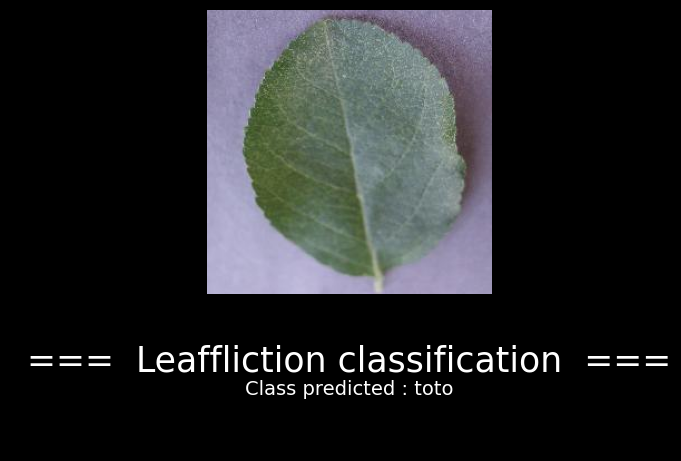

In [37]:
fig = plt.figure()
fig.patch.set_facecolor('black')
gs = GridSpec(nrows=2, ncols=1, height_ratios=[3, 1])
ax0 = fig.add_subplot(gs[0])
ax0.imshow(img, aspect='equal')  # Set aspect to 'equal' for square image
ax0.axis('off')
txt_part1 = "===  Leaffliction classification  ==="
txt_part2 = "Class predicted : " + "toto"
ax2 = fig.add_subplot(gs[1])
ax2.set_facecolor('black')
ax2.text(0.5, 0.7, txt_part1,
         color='white', fontsize=25, ha='center', va='center')
ax2.text(0.5, 0.4, txt_part2,
         color='white', fontsize=14, ha='center', va='center')
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, wspace=0.05, hspace=0.2)
manager = plt.get_current_fig_manager()
manager.set_window_title("Leafflction prediction result")
plt.show()

In [8]:
import os

In [57]:
imageDir =  "img_for_test/Distribution"
file_list = []
for folder in os.listdir(imageDir):
    # if not os.path.isdir(os.path.join(imageDir, folder)):
    #     continue
    for foldername, subdirectorys, filenames in os.walk(os.path.join(imageDir, folder)):
        filenames = [os.path.join(foldername, filename) for filename in filenames if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
        file_list += filenames
print(len(file_list))

file_list = list(set(file_list))
print(file_list) 
print(len(file_list))

17
['img_for_test/Distribution/test3/Apple_Black_rot/image (1).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (15).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (16).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (12).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (17).JPG', 'img_for_test/Distribution/test3/Apple_Black_rot/image (2).JPG', 'img_for_test/Distribution/test1/Apple_healthy/image (3).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (18).JPG', 'img_for_test/Distribution/test1/Apple_healthy/image (1).JPG', 'img_for_test/Distribution/test1/Apple_Black_rot/image (4).JPG', 'img_for_test/Distribution/test1/Apple_Black_rot/image (2).JPG', 'img_for_test/Distribution/test1/Apple_Black_rot/image (1).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (13).JPG', 'img_for_test/Distribution/test1/Apple_healthy/sub/image (4).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (14).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (

In [56]:
imageDir =  "img_for_test/Distribution"
file_list = []

for foldername, subdirectorys, filenames in os.walk(imageDir):
    filenames = [os.path.join(foldername, filename) for filename in filenames if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
    file_list += filenames
print(len(file_list))
file_list = list(set(file_list))
print(file_list) 
print(len(file_list))

17
['img_for_test/Distribution/test3/Apple_Black_rot/image (1).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (15).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (16).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (12).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (17).JPG', 'img_for_test/Distribution/test3/Apple_Black_rot/image (2).JPG', 'img_for_test/Distribution/test1/Apple_healthy/image (3).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (18).JPG', 'img_for_test/Distribution/test1/Apple_healthy/image (1).JPG', 'img_for_test/Distribution/test1/Apple_Black_rot/image (4).JPG', 'img_for_test/Distribution/test1/Apple_Black_rot/image (2).JPG', 'img_for_test/Distribution/test1/Apple_Black_rot/image (1).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (13).JPG', 'img_for_test/Distribution/test1/Apple_healthy/sub/image (4).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (14).JPG', 'img_for_test/Distribution/test1/Grape_Esca/image (

In [58]:
for elem in file_list:
    if not os.path.isfile(elem):
        print("NO")

In [59]:
file_list

['img_for_test/Distribution/test3/Apple_Black_rot/image (1).JPG',
 'img_for_test/Distribution/test1/Grape_Esca/image (15).JPG',
 'img_for_test/Distribution/test1/Grape_Esca/image (16).JPG',
 'img_for_test/Distribution/test1/Grape_Esca/image (12).JPG',
 'img_for_test/Distribution/test1/Grape_Esca/image (17).JPG',
 'img_for_test/Distribution/test3/Apple_Black_rot/image (2).JPG',
 'img_for_test/Distribution/test1/Apple_healthy/image (3).JPG',
 'img_for_test/Distribution/test1/Grape_Esca/image (18).JPG',
 'img_for_test/Distribution/test1/Apple_healthy/image (1).JPG',
 'img_for_test/Distribution/test1/Apple_Black_rot/image (4).JPG',
 'img_for_test/Distribution/test1/Apple_Black_rot/image (2).JPG',
 'img_for_test/Distribution/test1/Apple_Black_rot/image (1).JPG',
 'img_for_test/Distribution/test1/Grape_Esca/image (13).JPG',
 'img_for_test/Distribution/test1/Apple_healthy/sub/image (4).JPG',
 'img_for_test/Distribution/test1/Grape_Esca/image (14).JPG',
 'img_for_test/Distribution/test1/Grape_

In [63]:
np.array([type(file) == str for file in file_list]).all()

True

In [64]:
import random

In [73]:
image = Image.new('RGB', (256, 256), (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))


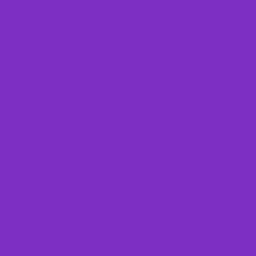

In [74]:
image

In [79]:

img_norm, _ = model._normalize(image, 0)
img_norm

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746],
        ...,
        [0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746]],

       [[0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746],
        ...,
        [0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746]],

       [[0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746],
        ...,
        [0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746],
        [0.49019608, 0.18431373, 0.76862746]],

       ...,

       [[0.49019608, 0.18431373, 0.76862746],
        [0.49

In [81]:
img_reshaped = tf.reshape(img_norm,tuple([1]+model.config.model.input_shape))

In [82]:
y_pred = model.model.predict(img_reshaped)


1/1 [==============================] - 0s 193ms/step


In [83]:
y_pred

array([[0.2039416 , 0.0511685 , 0.06476893, 0.06564128, 0.32889104,
        0.07978324, 0.05676115, 0.14904426]], dtype=float32)

In [ ]:
predicted_label = self.class_names[np.argmax(y_pred)]

In [1]:
import tempfile
import random
import os
import tensorflow as tf
from configs.CFG import CFG
from model.my_CNN_model import My_CNN_model
from dataloader.dataloader import DataLoader
import numpy as np
from PIL import Image
model = My_CNN_model(CFG)
model.build()


In [2]:
test_dir = tempfile.TemporaryDirectory()

In [3]:
for i in range(5):  # Creation of 5 images for test
    image_path = os.path.join(test_dir.name, f'test_image_{i}.png')
    image = Image.new('RGB', (256, 256), (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
    image.save(image_path)

In [4]:
img_path = "/var/folders/cq/36_5m7vj2p5gdh5m_ndm8l680000gn/T/tmp1u7vuh2p/test_image_3.png"

In [5]:
img_path

'/var/folders/cq/36_5m7vj2p5gdh5m_ndm8l680000gn/T/tmp1u7vuh2p/test_image_3.png'

In [6]:
img = np.array(Image.open(img_path, "r"))
img_norm, _ = model._normalize(img, 0)
y_pred = model.model.predict(
            tf.reshape(img_norm,tuple([1]+model.config.model.input_shape)))
predicted_label = model.class_names[np.argmax(y_pred)]

1/1 [==============================] - 0s 169ms/step


In [7]:
y_pred

array([[0.11603005, 0.11952818, 0.11581317, 0.1785047 , 0.06014606,
        0.09660354, 0.15985568, 0.15351863]], dtype=float32)

In [9]:
predictions = model.predict(test_dir.name)

/var/folders/cq/36_5m7vj2p5gdh5m_ndm8l680000gn/T/tmpr48owy5s/test_image_3.png
1/1 [==============================] - 0s 111ms/step
/var/folders/cq/36_5m7vj2p5gdh5m_ndm8l680000gn/T/tmpr48owy5s/test_image_2.png
1/1 [==============================] - 0s 101ms/step
/var/folders/cq/36_5m7vj2p5gdh5m_ndm8l680000gn/T/tmpr48owy5s/test_image_0.png
1/1 [==============================] - 0s 97ms/step
/var/folders/cq/36_5m7vj2p5gdh5m_ndm8l680000gn/T/tmpr48owy5s/test_image_1.png
1/1 [==============================] - 0s 95ms/step
/var/folders/cq/36_5m7vj2p5gdh5m_ndm8l680000gn/T/tmpr48owy5s/test_image_4.png
1/1 [==============================] - 0s 99ms/step


In [10]:
predictions

['class_3', 'class_3', 'class_3', 'class_3', 'class_3']

In [1]:
import argparse
import os
from model.my_CNN_model import My_CNN_model
from dataloader.Augmentation import Augmentation
from dataloader.Distribution import Distribution
from dataloader.Balance import Balance
from configs.CFG import CFG
from utils.config import Config
import logging

config = Config.from_json(CFG)

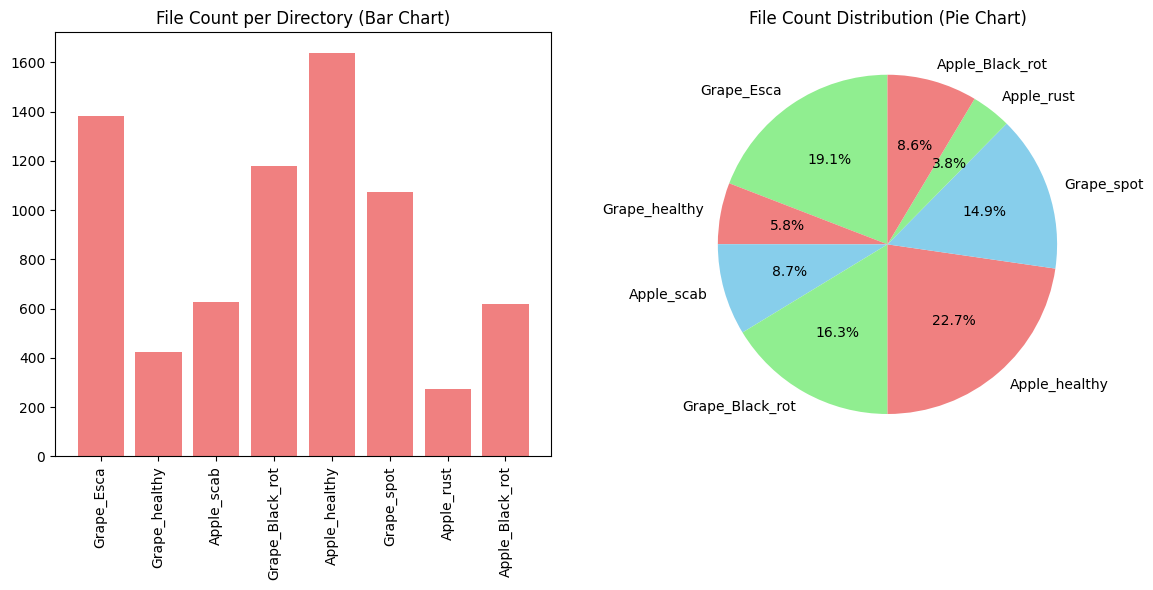

In [2]:
Distribution(config.data.path).plot()

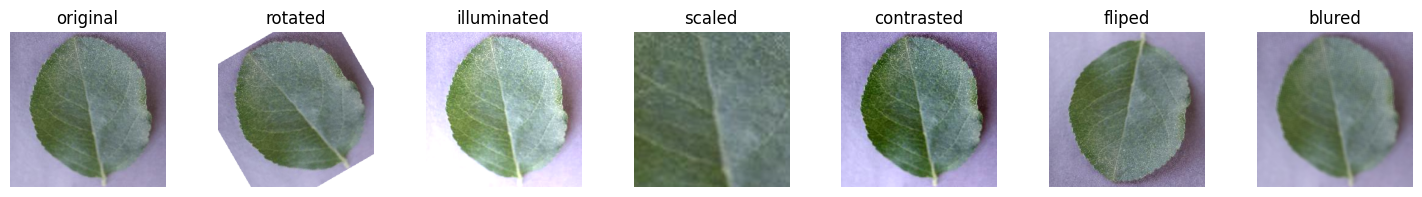

In [5]:
Augmentation(**CFG["augmentation"]).generate_augmented_imgs()